   TRAINING RESEARCH MODEL (RF)

Model Performance on Test Set:
------------------------------
   > R² Score:   0.8814
   > MAE:        3.7814 MPa
   > MSE:        30.5540
   > RMSE:       5.5276 MPa
   > MAPE:       12.43%
------------------------------


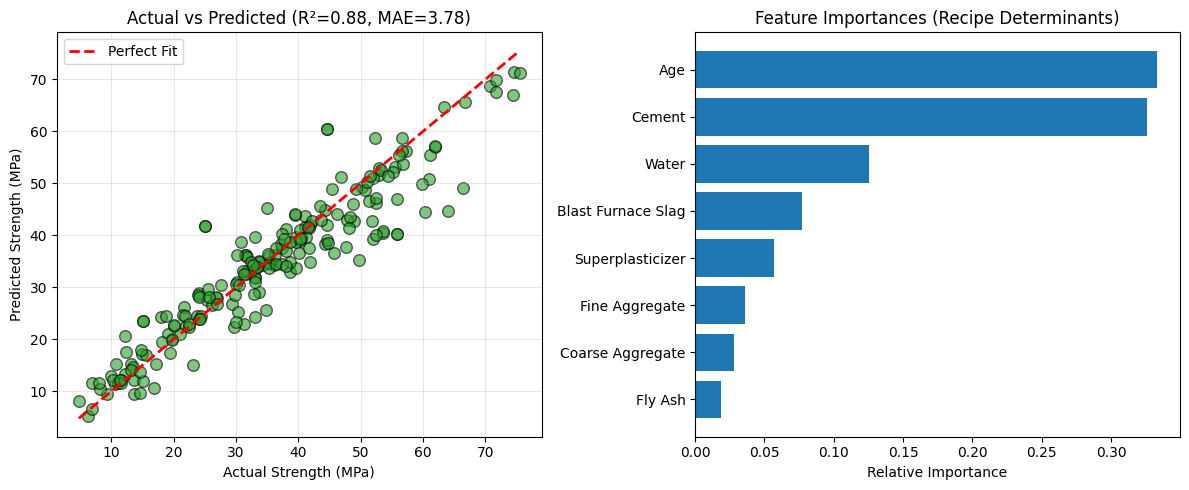

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# Added imports for MSE and MAPE
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error

# --- 1. LOAD DATA ---
df_research = pd.read_csv("Data/zainfaisal_pakistan_concrete_data.csv")

# --- 2. PREPROCESSING ---
# Clean column names
df_research.columns = df_research.columns.str.strip()

# Define Features (X) and Target (y)
feature_cols = [
    'Cement', 
    'Blast Furnace Slag', 
    'Fly Ash', 
    'Water', 
    'Superplasticizer', 
    'Coarse Aggregate', 
    'Fine Aggregate', 
    'Age'
]

X = df_research[feature_cols]
y = df_research['Strength']

# Split Data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. TRAIN RANDOM FOREST MODEL ---
print("="*40)
print("   TRAINING RESEARCH MODEL (RF)")
print("="*40)

# Initialize Random Forest with robust parameters
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# --- 4. EVALUATION ---
predictions = rf_model.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

print("\nModel Performance on Test Set:")
print("-" * 30)
print(f"   > R² Score:   {r2:.4f}")
print(f"   > MAE:        {mae:.4f} MPa")
print(f"   > MSE:        {mse:.4f}")
print(f"   > RMSE:       {rmse:.4f} MPa")
print(f"   > MAPE:       {mape:.2%}")
print("-" * 30)

# --- 5. VISUALIZATION ---
plt.figure(figsize=(12, 5))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, color='#2ca02c', alpha=0.6, edgecolors='k', s=70)
min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Fit')
plt.xlabel("Actual Strength (MPa)")
plt.ylabel("Predicted Strength (MPa)")
plt.title(f"Actual vs Predicted (R²={r2:.2f}, MAE={mae:.2f})")
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Feature Importance
plt.subplot(1, 2, 2)
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances (Recipe Determinants)')
plt.barh(range(len(indices)), importances[indices], color='#1f77b4', align='center')
plt.yticks(range(len(indices)), [feature_cols[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()

plt.show()